In [1]:
import osh5def
import osh5vis
import osh5io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
sys.path.append('../src')
sys.path.append('../src/vysxd')
sys.path.append('../FLASH_OSIRIS_interface')
from FLASH_OSIRIS_define import FLASH_OSIRIS

# # # Set the default font size for axis labels
# plt.rcParams['axes.labelsize'] = 16
# plt.rcParams['axes.titlesize'] = 20
# # Set the default font size for tick labels
# plt.rcParams['xtick.labelsize'] = 14
# plt.rcParams['ytick.labelsize'] = 14

yt : [INFO     ] 2025-05-17 10:31:00,635 Loading plugins from /home/dschneidinger/.config/yt/my_plugins.py


In [2]:
interface = FLASH_OSIRIS(
    FLASH_data="/home/dschneidinger/shared/data/VAC_DEREK3D_20um/MagShockZ_hdf5_chk_0006",
    inputfile_name="magshockz-v3.2.1d",
    osiris_dims=1,
    reference_density=5e18,
    ppc=100,
    start_point=[0, 540],
    theta=np.pi / 2,
    xmax = 7200,
    ion_mass_thresholds=[28,35],
    rqm_factor=10,
    B_background=75000,
    dx_ndebye=20,
)


2025-05-17 10:31:09,701 - FLASH_OSIRIS_define - INFO - Loading FLASH data from /home/dschneidinger/shared/data/VAC_DEREK3D_20um/MagShockZ_hdf5_chk_0006
yt : [INFO     ] 2025-05-17 10:31:09,948 Parameters: current_time              = 4.157630190965378e-09
yt : [INFO     ] 2025-05-17 10:31:09,949 Parameters: domain_dimensions         = [384 496 384]
yt : [INFO     ] 2025-05-17 10:31:09,949 Parameters: domain_left_edge          = [-0.8   -0.075 -0.8  ]
yt : [INFO     ] 2025-05-17 10:31:09,950 Parameters: domain_right_edge         = [0.8 2.  0.8]
yt : [INFO     ] 2025-05-17 10:31:09,950 Parameters: cosmological_simulation   = 0
2025-05-17 10:31:13,895 - FLASH_OSIRIS_define - INFO - ==================================================
2025-05-17 10:31:13,899 - FLASH_OSIRIS_define - INFO - INITIALIZING FLASH-OSIRIS INTERFACE
2025-05-17 10:31:13,899 - FLASH_OSIRIS_define - INFO - FLASH data: /home/dschneidinger/shared/data/VAC_DEREK3D_20um/MagShockZ_hdf5_chk_0006
2025-05-17 10:31:13,900 - FLASH

Channel rqm: 1835


2025-05-17 10:31:20,633 - FLASH_OSIRIS_define - INFO - Debye length: 0.006562824201432289 osiris units
2025-05-17 10:31:20,635 - FLASH_OSIRIS_define - INFO - Background temperature: 22 eV
2025-05-17 10:31:24,745 - FLASH_OSIRIS_define - INFO - ********** real mass ratio: 7129.342627534372 dimensionless **********


In [ ]:
data_dir = Path(f'../simulations/raw_data/{interface.inputfile_name}/MS') 
# data_dir = Path('../simulations/restart/magshockz-v3.1.1d-200-100-100ppc/MS')
# data_dir = Path('../simulations/save_data/magshockz-v3.1.1d-200-100-100ppc/MS')

def look_through_data(data_dir:Path, diagnostics:dict):
    for item in data_dir.rglob(''):
        item = item.relative_to(data_dir)
        dirs = item.as_posix().split('/')
        if len(dirs) > 1:
            diagnostics[item.as_posix()] = item.as_posix()

diagnostics = {}
look_through_data(data_dir, diagnostics)
fields = {
    'p1x1/electrons' : f'{data_dir / diagnostics["PHA/p1x1/electrons"]}/p1x1-electrons',
    'p1x1/si': f'{data_dir / diagnostics["PHA/p1x1/si"]}/p1x1-si',
    'p1x1/channel': f'{data_dir / diagnostics["PHA/p1x1/channel"]}/p1x1-channel',
    'p1x1/sheathe': f'{data_dir / diagnostics["PHA/p1x1/sheathe"]}/p1x1-sheathe',
    'p1x1/background': f'{data_dir / diagnostics["PHA/p1x1/background"]}/p1x1-background',
    # 'p1x1/Aluminum' : f'{data_dir / diagnostics["PHA/p1x1/Aluminum"]}/p1x1-Aluminum',
    # 'p2x1/electron' : f'{data_dir / diagnostics["PHA/p2x1/electron"]}/p2x1-electron',
    # 'p2x1/si' : f'{data_dir / diagnostics["PHA/p2x1/Silicon"]}/p2x1-si',
    'FLD/b1-savg' : f'{data_dir / diagnostics["FLD/b1-savg"]}/b1-savg',
    'FLD/b2-savg' : f'{data_dir / diagnostics["FLD/b2-savg"]}/b2-savg',
    'FLD/b3-savg' : f'{data_dir / diagnostics["FLD/b3-savg"]}/b3-savg',
    'FLD/e1-savg' : f'{data_dir / diagnostics["FLD/e1-savg"]}/e1-savg',
    'FLD/e2-savg' : f'{data_dir / diagnostics["FLD/e2-savg"]}/e2-savg',
    'FLD/e3-savg' : f'{data_dir / diagnostics["FLD/e3-savg"]}/e3-savg',
    'DENSITY/channel': f'{data_dir / diagnostics["DENSITY/channel/charge"]}/charge-channel',
    'DENSITY/background': f'{data_dir / diagnostics["DENSITY/background/charge"]}/charge-background',
    'DENSITY/sheathe': f'{data_dir / diagnostics["DENSITY/sheathe/charge"]}/charge-sheathe',
    'DENSITY/si': f'{data_dir / diagnostics["DENSITY/si/charge"]}/charge-si',
    'UDIST/si/ufl1': f'{data_dir / diagnostics["UDIST/si/ufl1"]}/ufl1-si',
    'UDIST/background/ufl1': f'{data_dir / diagnostics["UDIST/background/ufl1"]}/ufl1-background',
}

vlimits = {
    'p1x1/electron' : (0, 0.1),
    # 'p1x1/Silicon' : (0, 400),
    # 'p1x1/Aluminum' : (0.1, 300),
    'p1x1/Silicon' : (0.1, 300),
    'p1x1/channel' : (0.1, 8),
    'p2x1/electron' : (0, 0.1),
    'p2x1/Aluminum' : (0, 0.1),
    'p1x1/positron' : (0, 0.1),
    'FLD/b1-savg' : (-0.2, 0.2),
    'FLD/b2-savg' : (-0.4, 0.02),
    'FLD/b3-savg' : (-0.2, 0.2),
    'FLD/e1-savg' : (-0.8, 0.8),
    'FLD/e2-savg' : (-0.08, 0.08),
    'FLD/e3-savg' : (-0.04, 0.04),
    'DENSITY/channel': (0, 10),
    'DENSITY/Silicon': (0, 20),
    'UDIST/Silicon/ufl1': (-.07, 0.04),
    'UDIST/Aluminum/ufl1': (-.07, 0.04),
}

../simulations/raw_data/magshockz-v3.2.1d/MS


In [ ]:

import make_movie_mp


make_movie_mp.phase_space_movie(path_to_data = [fields['p1x1/channel'],fields['p1x1/si']],
      vlimits = vlimits['p1x1/channel'],
      gyrotime = interface.gyrotime,n_jobs=1, dpi = 100)

# make_movie_mp.movie(path_to_data = fields['DENSITY/channel'],gyrotime=9570)

/home/dschneidinger/MagShockZ/analysis_notebooks/../src/make_movie_mp.py:69: RuntimeWarning: divide by zero encountered in log
  osh5vis.osplot(np.log(data_0), vmax=vlimits[1], vmin=vlimits[0], cmap = 'hot') if vlimits else osh5vis.osplot(data_0).set_ticks([])
/home/dschneidinger/MagShockZ/analysis_notebooks/../src/make_movie_mp.py:75: RuntimeWarning: divide by zero encountered in log
  osh5vis.osplot(np.log(data_1), vmax=vlimits[1], vmin=vlimits[0], cmap = 'viridis') if vlimits else osh5vis.osplot(data_1).set_ticks([])
2025-05-17 10:43:49,977 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-05-17 10:43:49,981 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1920x1440 -pix_fmt rgba -framerate 16.666666666666668 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpnm8y1rf1/temp.m4v


/home/dschneidinger/MagShockZ/analysis_notebooks/../src/make_stack_plots.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


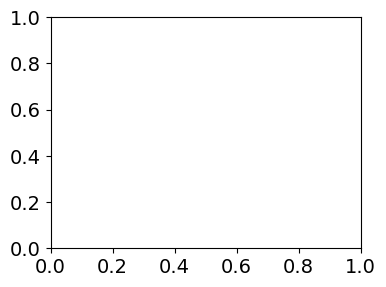

ValueError: Image size of 3571215x425 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x425 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x794 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x1164 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x1534 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x1903 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x2273 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x2642 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x3012 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x3382 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x3751 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x4121 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x4490 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x4860 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x5230 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x5599 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x5969 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x6338 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x6708 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x7078 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x7447 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x7817 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x8186 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x8556 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x8926 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x9295 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x9665 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x10034 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x10404 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x10774 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x11143 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571215x11513 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 3571244x11911 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [4]:
from make_stack_plots import make_joy_plot
from scipy.signal import savgol_filter

# Ensure the path to ion charge density files is correct
path_to_data = Path(fields['FLD/b2-savg']).parent

fig, ax = make_joy_plot(path_to_data)
plt.title(r"$\theta = 90$, $M_A = 13$, rqm = 100, $B_y$")
plt.show()

In [5]:
data.attrs

NameError: name 'data' is not defined

In [ ]:
data_0 = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/electrons/charge"]}/charge-electrons-000000.h5')

data_0.run_attrs[]

{'simdir': '../raw_data/rqm25_M25_theta45.2d',
 'dirname': '../raw_data/rqm25_M25_theta45.2d/MS/DENSITY/electrons/charge',
 'extension': '.h5',
 'ITER': array([0], dtype=int32),
 'NAME': 'charge',
 'OFFSET_T': array([0.]),
 'OFFSET_X': array([0.5, 0.5]),
 'TIME': array([0.]),
 'TIME UNITS': osh5def.OSUnits at 0x747cf7fb2f90: ('m_e', 'c', '\\omega', 'e', 'n_0')=(0, 0, -1, 0, 0),
 'TYPE': 'grid',
 'SIMULATION': {'COMPILE_TIME': array([b'Feb 19 2025 17:02:09'], dtype='|S1024'),
  'DT': array([0.07]),
  'GIT_VERSION': array([b'4.4.4-292-gfe9aada-dirty'], dtype='|S1024'),
  'INPUT_FILE': array([b'input_file.txt'], dtype='|S1024'),
  'INPUT_FILE_CRC32': array([1.68560242e+09]),
  'MOVE C': array([0, 0], dtype=int32),
  'NDIMS': array([2], dtype=int32),
  'NX': array([4096,  512], dtype=int32),
  'PAR_NODE_CONF': array([4, 4], dtype=int32),
  'PAR_NX_X1': array([1024, 1024, 1024, 1024], dtype=int32),
  'PAR_NX_X2': array([128, 128, 128, 128], dtype=int32),
  'PERIODIC': array([0, 1], dtype=in

In [ ]:
frame= 0
c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{frame:06d}.h5')
b = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Aluminum/charge"]}/charge-Aluminum-{frame:06d}.h5')
a = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/electron/charge"]}/charge-electron-{frame:06d}.h5')
# osh5vis.osplot(c,cmap = 'hot',title = r"$Zn_i$" + f", t = {round((c.run_attrs['TIME']/4781.497)[0],3)}" +  r"$\omega_{ci}^{-1}$",vmax = 9)
osh5vis.osplot(c+b+a,cmap = 'hot', title = r"$\rho_{total}$, t = " + f"{(c.run_attrs['TIME'])}")

KeyError: 'DENSITY/Magnesium/charge'

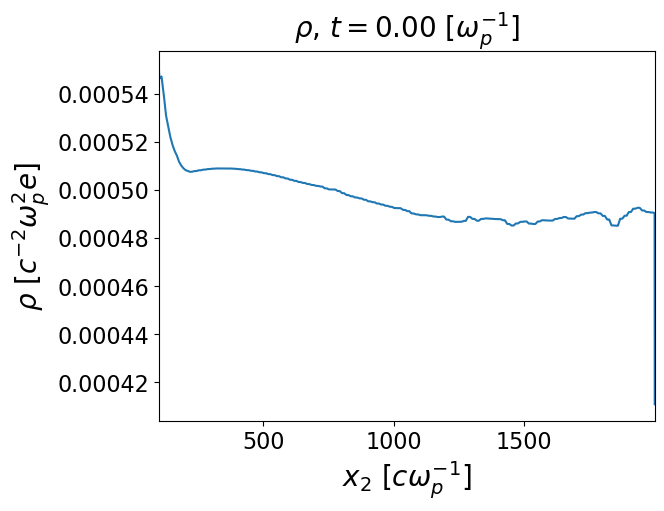

In [ ]:
c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{0:06d}.h5')
plot = osh5vis.osplot(c[:,100])


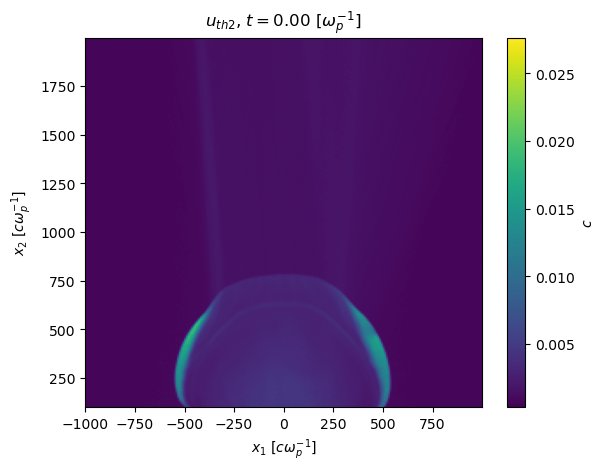

In [ ]:
c = osh5io.read_h5(f'{data_dir}/UDIST/Aluminum/uth2/uth2-Aluminum-000000.h5')
plot = osh5vis.osplot(c)

In [ ]:
stack = []  # Initialize an empty list to store slices
aluminum_path = Path(fields['DENSITY/Silicon']).parent

for file in sorted(aluminum_path.glob('*.h5')):
    slice = osh5io.read_h5(file.as_posix())  # Read the current file
    print(np.shape(slice))
    stack.append(slice)  # Append the slice to the list
    print(np.shape(stack))  # Combine all slices into a single array
stack = osh5def.

(100000,)
(1, 100000)
(100000,)
(2, 100000)
(100000,)
(3, 100000)
(100000,)
(4, 100000)
(100000,)
(5, 100000)
(100000,)
(6, 100000)
(100000,)
(7, 100000)
(100000,)
(8, 100000)
(100000,)
(9, 100000)
(100000,)
(10, 100000)
(100000,)
(11, 100000)
(100000,)
(12, 100000)
(100000,)
(13, 100000)
(100000,)
(14, 100000)
(100000,)
(15, 100000)
(100000,)
(16, 100000)
(100000,)
(17, 100000)
(100000,)
(18, 100000)
(100000,)
(19, 100000)
(100000,)
(20, 100000)
(100000,)
(21, 100000)
(100000,)
(22, 100000)
(100000,)
(23, 100000)
(100000,)
(24, 100000)


In [ ]:
osh5vis.osplot(stack)

AttributeError: 'numpy.ndarray' object has no attribute 'axes'